In [0]:
!mkdir -p data/spam_data

In [2]:
!ls data

spam_data


In [3]:
!wget https://spamassassin.apache.org/old/publiccorpus/20030228_easy_ham.tar.bz2
!wget https://spamassassin.apache.org/old/publiccorpus/20030228_easy_ham_2.tar.bz2
!wget https://spamassassin.apache.org/old/publiccorpus/20030228_spam.tar.bz2
!wget https://spamassassin.apache.org/old/publiccorpus/20050311_spam_2.tar.bz2
!wget https://spamassassin.apache.org/old/publiccorpus/20030228_hard_ham.tar.bz2

--2019-09-04 15:23:33--  https://spamassassin.apache.org/old/publiccorpus/20030228_easy_ham.tar.bz2
Resolving spamassassin.apache.org (spamassassin.apache.org)... 95.216.24.32, 40.79.78.1, 2a01:4f9:2a:185f::2
Connecting to spamassassin.apache.org (spamassassin.apache.org)|95.216.24.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1612216 (1.5M) [application/x-bzip2]
Saving to: ‘20030228_easy_ham.tar.bz2’

20030228_easy_ham.t 100%[===================>]   1.54M   762KB/s    in 2.1s    

2019-09-04 15:23:36 (762 KB/s) - ‘20030228_easy_ham.tar.bz2’ saved [1612216/1612216]

--2019-09-04 15:23:38--  https://spamassassin.apache.org/old/publiccorpus/20030228_easy_ham_2.tar.bz2
Resolving spamassassin.apache.org (spamassassin.apache.org)... 95.216.24.32, 40.79.78.1, 2a01:4f9:2a:185f::2
Connecting to spamassassin.apache.org (spamassassin.apache.org)|95.216.24.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1077892 (1.0M) [application/x-bzip

In [4]:
!tar xvjf 20030228_easy_ham_2.tar.bz2
!tar xvjf 20030228_easy_ham.tar.bz2
!tar xvjf 20030228_hard_ham.tar.bz2    
!tar xvjf 20030228_spam.tar.bz2
!tar xvjf 20050311_spam_2.tar.bz2

easy_ham_2/
easy_ham_2/01394.b4dd1cece01b908f040e33493643c4a4
easy_ham_2/00002.5a587ae61666c5aa097c8e866aedcc59
easy_ham_2/00003.19be8acd739ad589cd00d8425bac7115
easy_ham_2/00004.b2ed6c3c62bbdfab7683d60e214d1445
easy_ham_2/00005.07b9d4aa9e6c596440295a5170111392
easy_ham_2/00006.654c4ec7c059531accf388a807064363
easy_ham_2/00007.2e086b13730b68a21ee715db145522b9
easy_ham_2/00008.6b73027e1e56131377941ff1db17ff12
easy_ham_2/00009.13c349859b09264fa131872ed4fb6e4e
easy_ham_2/00010.d1b4dbbad797c5c0537c5a0670c373fd
easy_ham_2/00011.bc1aa4dca14300a8eec8b7658e568f29
easy_ham_2/00012.3c1ff7380f10a806321027fc0ad09560
easy_ham_2/00013.245fc5b9e5719b033d5d740c51af92e0
easy_ham_2/00014.8e21078a89bd9c57255d302f346551e8
easy_ham_2/00015.d5c8f360cf052b222819718165db24c6
easy_ham_2/00016.bc1f434b566619637a0de033cd3380d1
easy_ham_2/00017.8b965080dfffada165a54c041c27e33f
easy_ham_2/00018.3b6a8c5da4043f2a6a63a1ae12bd9824
easy_ham_2/00019.c6b272a04ec32252f7c685f464ae3942
easy_ham_2/00020.83ef024f76cc42b8245a6

In [0]:
!mv easy_ham data/spam_data  
!mv easy_ham_2 data/spam_data
!mv hard_ham data/spam_data
!mv spam data/spam_data
!mv spam_2 data/spam_data

In [0]:
%matplotlib inline
import os
import glob
import numpy as np
import email

In [0]:
path = 'data/spam_data/'

In [0]:
easy_ham_paths = glob.glob(path+'easy_ham/*')
easy_ham_2_paths = glob.glob(path+'easy_ham_2/*')
hard_ham_paths = glob.glob(path+'hard_ham/*')
spam_paths = glob.glob(path+'spam/*')
spam_2_paths = glob.glob(path+'spam_2/*')

In [0]:
def get_email_content(email_path):
    file = open(email_path,encoding='latin1')
    try:
        msg = email.message_from_file(file)
        for part in msg.walk():
            if part.get_content_type() == 'text/plain':
                return part.get_payload() # prints the raw text
    except Exception as e:
        print(e)
        
        
def get_email_content_bulk(email_paths):
    email_contents = [get_email_content(o) for o in email_paths]
    return email_contents

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
ham_path = [
    easy_ham_paths,
    easy_ham_2_paths,
    hard_ham_paths
]

spam_path = [
    spam_paths,
    spam_2_paths
]

In [0]:
ham_sample = np.array([train_test_split(o) for o in ham_path])

In [0]:
ham_train = np.array([])
ham_test = np.array([])
for o in ham_sample:
    ham_train = np.concatenate((ham_train,o[0]),axis=0)
    ham_test = np.concatenate((ham_test,o[1]),axis=0)

In [14]:
ham_train.shape, ham_test.shape

((3113,), (1040,))

In [0]:
spam_sample = np.array([train_test_split(o) for o in spam_path])

In [0]:
spam_train = np.array([])
spam_test = np.array([])
for o in spam_sample:
    spam_train = np.concatenate((spam_train,o[0]),axis=0)
    spam_test = np.concatenate((spam_test,o[1]),axis=0)

In [17]:
spam_train.shape, spam_test.shape

((1422,), (476,))

In [0]:
ham_train_label = [0]*ham_train.shape[0]
spam_train_label = [1]*spam_train.shape[0]
x_train = np.concatenate((ham_train,spam_train))
y_train = np.concatenate((ham_train_label,spam_train_label))

In [0]:
ham_test_label = [0]*ham_test.shape[0]
spam_test_label = [1]*spam_test.shape[0]
x_test = np.concatenate((ham_test,spam_test))
y_test = np.concatenate((ham_test_label,spam_test_label))

In [0]:
train_shuffle_index = np.random.permutation(np.arange(0,x_train.shape[0]))
test_shuffle_index = np.random.permutation(np.arange(0,x_test.shape[0]))

In [0]:
x_train = x_train[train_shuffle_index]
y_train = y_train[train_shuffle_index]

In [0]:
x_test = x_test[test_shuffle_index]
y_test = y_test[test_shuffle_index]

In [0]:
x_train = get_email_content_bulk(x_train)
x_test = get_email_content_bulk(x_test)

In [0]:
def remove_null(datas,labels):
    not_null_idx = [i for i,o in enumerate(datas) if o is not None]
    return np.array(datas)[not_null_idx],np.array(labels)[not_null_idx]

In [0]:
x_train,y_train = remove_null(x_train,y_train)
x_test,y_test = remove_null(x_test,y_test)

# Preprocessing

## Process sentence

### Cleaning Up (Part 1)

In [0]:
import re
import string
from nltk.tokenize import word_tokenize

In [0]:
def remove_hyperlink(word):
    return  re.sub(r"http\S+", "", word)

In [0]:
def to_lower(word):
    result = word.lower()
    return result

In [0]:
def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

In [0]:
def remove_punctuation(word):
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

In [0]:
def remove_whitespace(word):
    result = word.strip()
    return result

In [0]:
def replace_newline(word):
    return word.replace('\n','')

In [0]:
def clean_up_pipeline(sentence):
    cleaning_utils = [remove_hyperlink,
                      replace_newline,
                      to_lower,
                      remove_number,
                      remove_punctuation,remove_whitespace]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

In [0]:
x_train = [clean_up_pipeline(o) for o in x_train]
x_test = [clean_up_pipeline(o) for o in x_test]

### Cleaning Up (Part 2)

In [0]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [36]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [0]:
# Tokenization are taking slightly longer to process

x_train = [word_tokenize(o) for o in x_train]
x_test = [word_tokenize(o) for o in x_test]

In [0]:
def remove_stop_words(words):
    result = [i for i in words if i not in ENGLISH_STOP_WORDS]
    return result

In [0]:
def word_stemmer(words):
    return [stemmer.stem(o) for o in words]

In [0]:
def word_lemmatizer(words):
    return [lemmatizer.lemmatize(o) for o in words]

In [0]:
def clean_token_pipeline(words):
    cleaning_utils = [remove_stop_words,word_lemmatizer]
    for o in cleaning_utils:
        words = o(words)
    return words

In [0]:
x_train = [clean_token_pipeline(o) for o in x_train]
x_test = [clean_token_pipeline(o) for o in x_test]

In [0]:
x_train = [" ".join(o) for o in x_train]
x_test = [" ".join(o) for o in x_test]

# Visualization

This section of visualization code is referred from: https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc

## Wordcloud

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [0]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [0]:
spam_train_index = [i for i,o in enumerate(y_train) if o == 1]
non_spam_train_index = [i for i,o in enumerate(y_train) if o == 0]

In [0]:
spam_email = np.array(x_train)[spam_train_index]
non_spam_email = np.array(x_train)[non_spam_train_index]

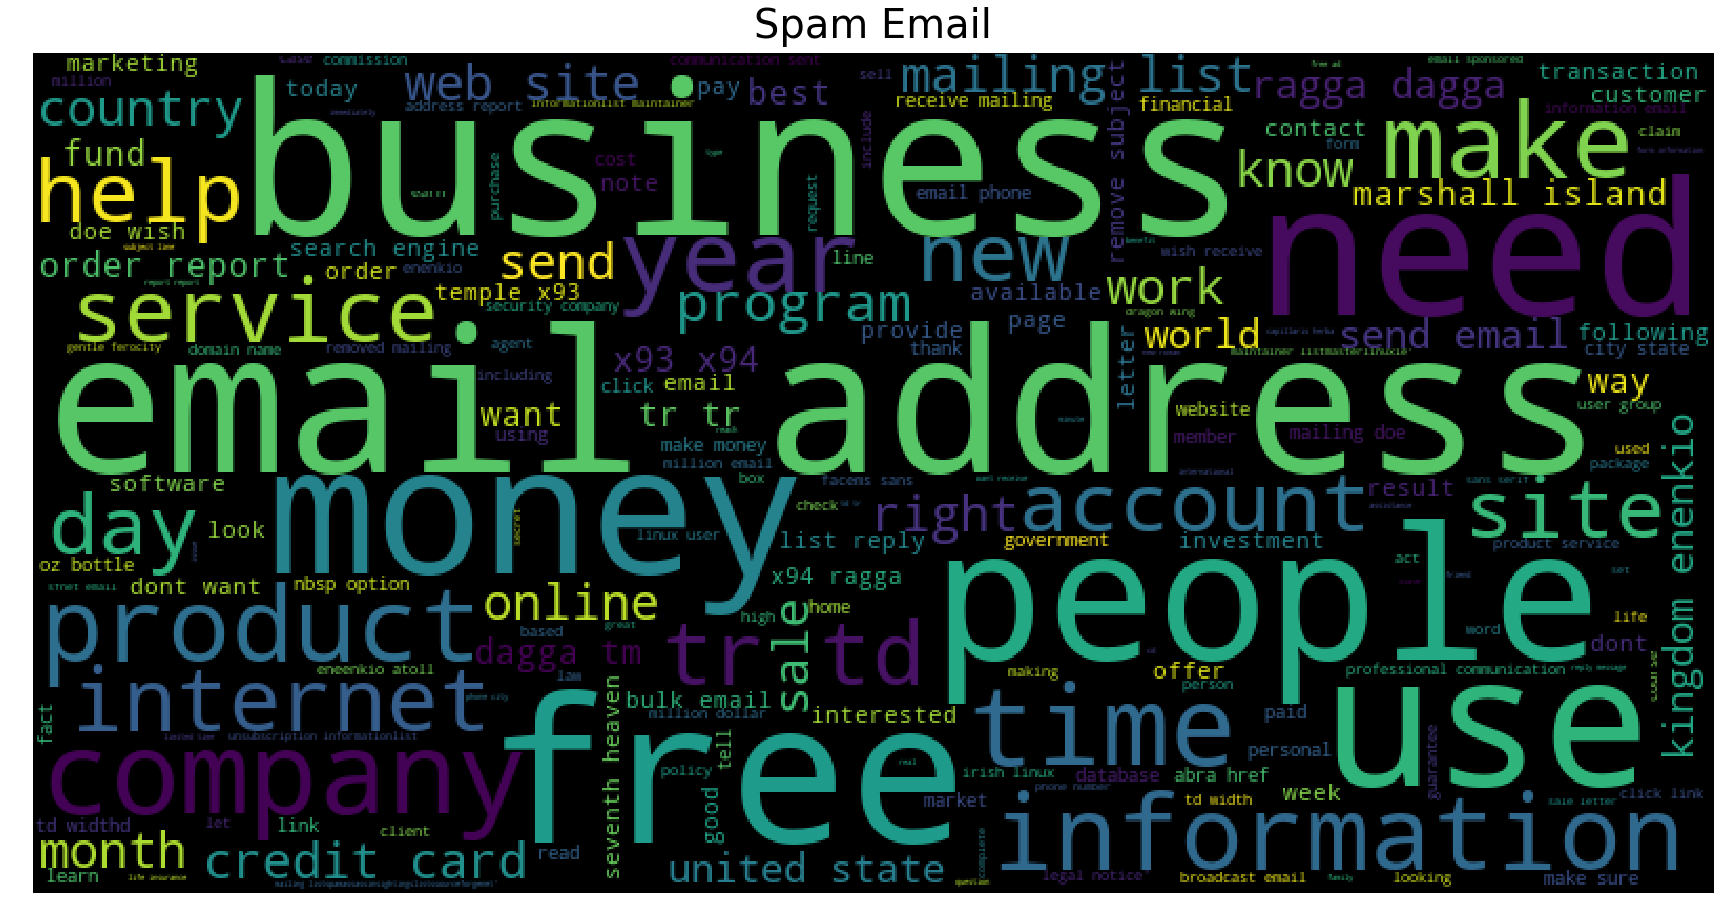

In [51]:
plot_wordcloud(spam_email,title = 'Spam Email')

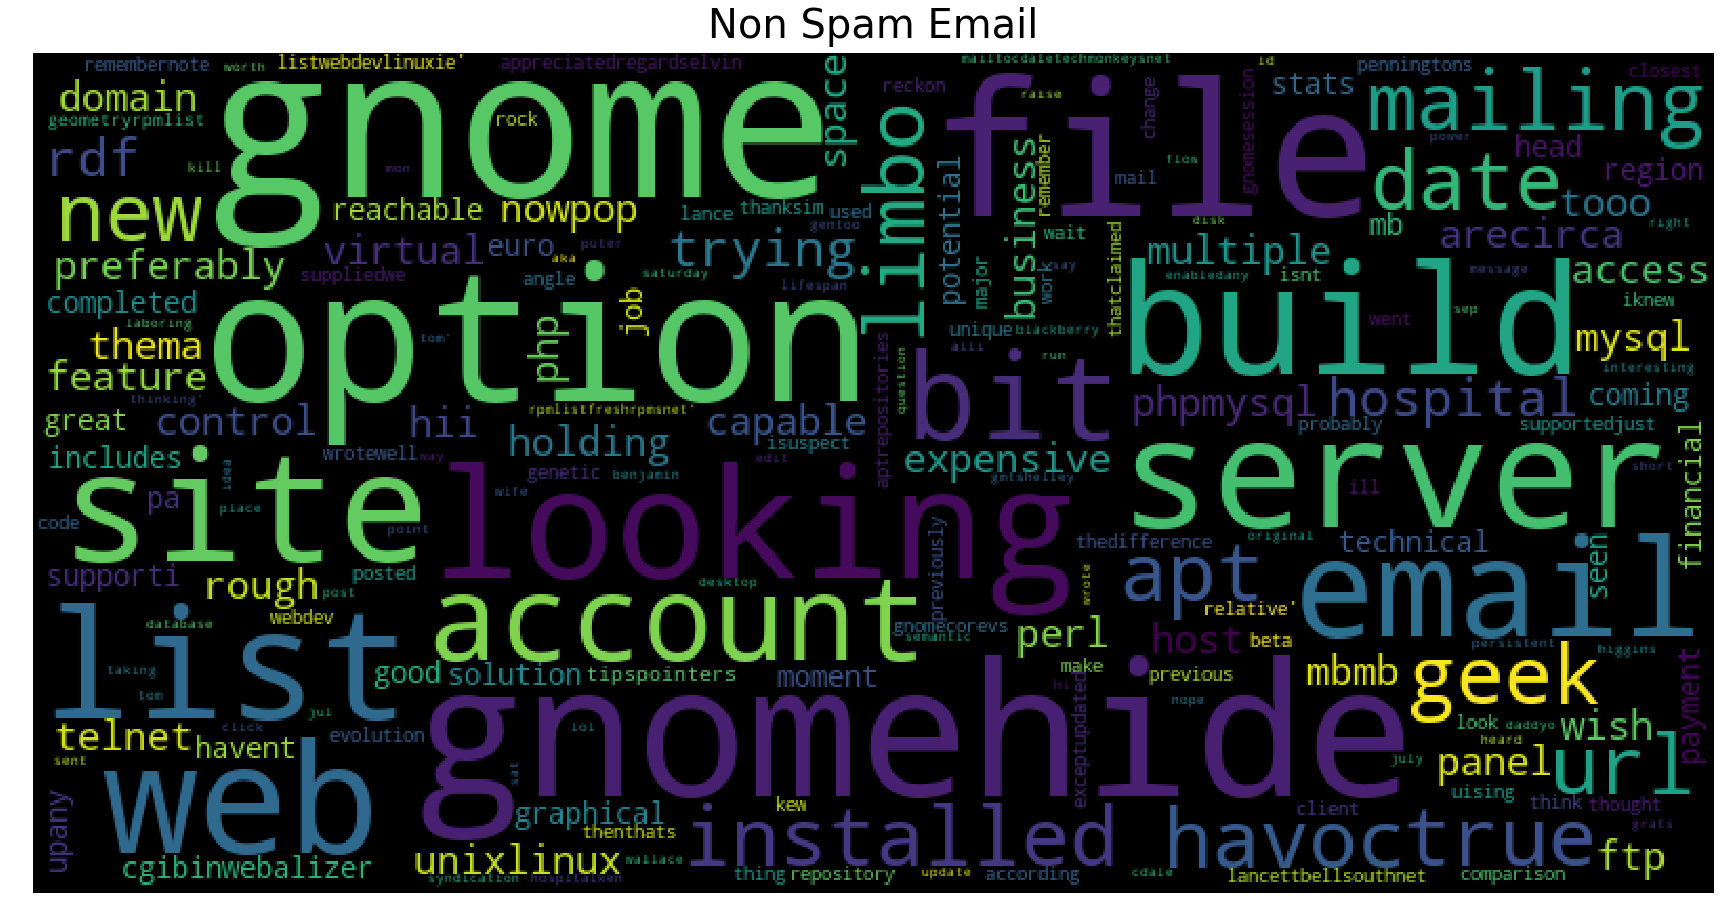

In [52]:
plot_wordcloud(non_spam_email,title="Non Spam Email")

# Visualizing using bar chart

In [0]:
# This function is needed to include in the cell to show the plotly graph 
# in colab

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [54]:
from collections import defaultdict
import pandas as pd
import plotly.graph_objs as go
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [0]:
## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace


In [0]:
def visualize_in_bar_chart(word_count=1):
    ## Get the bar chart from sincere questions ##
    freq_dict = defaultdict(int)
    for sent in non_spam_email:
        for word in generate_ngrams(sent,word_count):
            freq_dict[word] += 1
    fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
    fd_sorted.columns = ["word", "wordcount"]
    trace0 = horizontal_bar_chart(fd_sorted.head(20), 'orange')

    ## Get the bar chart from insincere questions ##
    freq_dict = defaultdict(int)
    for sent in spam_email:
        for word in generate_ngrams(sent,word_count):
            freq_dict[word] += 1
    fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
    fd_sorted.columns = ["word", "wordcount"]
    trace1 = horizontal_bar_chart(fd_sorted.head(20), 'orange')

    # Creating two subplots
    fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                              subplot_titles=["Frequent words of non spam email", 
                                              "Frequent words of spam email"])
    fig.append_trace(trace0, 1, 1)
    fig.append_trace(trace1, 1, 2)
    fig['layout'].update(height=600, width=800, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
    py.iplot(fig, filename='word-plots')

In [57]:
configure_plotly_browser_state()
visualize_in_bar_chart(2)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



## Target Distribution

In [58]:
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [0]:
spam_train_index = [i for i,o in enumerate(y_train) if o == 1]
non_spam_train_index = [i for i,o in enumerate(y_train) if o == 0]

In [60]:
configure_plotly_browser_state()

spam_size = len(spam_train_index)
non_spam_size = len(non_spam_train_index)
total_train_size = spam_size + non_spam_size

trace = go.Bar(
    x=["Spam","Non Spam"],
    y=[spam_size, non_spam_size],
    marker=dict(
        color=[spam_size, non_spam_size],
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Target Count for Train Data',
    font=dict(size=18)
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")

## target distribution ##
labels = (np.array(["Spam", "Non Spam"]))
sizes = (np.array(([spam_size,non_spam_size]))/total_train_size*100)

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Train Data distribution',
    font=dict(size=18),
    width=600,
    height=600,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="usertype")

In [61]:
configure_plotly_browser_state()

spam_test_index = [i for i,o in enumerate(y_test) if o == 1]
non_spam_test_index = [i for i,o in enumerate(y_test) if o == 0]

spam_size = len(spam_test_index)
non_spam_size = len(non_spam_test_index)
total_test_size = spam_size + non_spam_size

trace = go.Bar(
    x=["Spam","Non Spam"],
    y=[spam_size, non_spam_size],
    marker=dict(
        color=[spam_size, non_spam_size],
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Target Count for Test Data',
    font=dict(size=18)
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")

## target distribution ##
labels = (np.array(["Spam", "Non Spam"]))
sizes = (np.array(([spam_size,non_spam_size]))/total_train_size*100)

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Test Data Distribution',
    font=dict(size=18),
    width=600,
    height=600,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="usertype")

# Feature Extraction

Choose either TfidVectorizer of CountVectorizer

## TfidVectorizer

In [0]:
x_train = [o.split(" ") for o in x_train]
x_test = [o.split(" ") for o in x_test]

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
vectorizer = TfidfVectorizer()
raw_sentences = [' '.join(o) for o in x_train]
vectorizer.fit(raw_sentences)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
def convert_to_feature(raw_tokenize_data):
    raw_sentences = [' '.join(o) for o in raw_tokenize_data]
    return vectorizer.transform(raw_sentences)

In [0]:
x_train_features = convert_to_feature(x_train)
x_test_features = convert_to_feature(x_test)

## CountVectorizer

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
vectorizer = CountVectorizer()
raw_sentences = [' '.join(o) for o in x_train]
vectorizer.fit(raw_sentences)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
x_train_features = convert_to_feature(x_train)
x_test_features = convert_to_feature(x_test)

## Training classifier

## Gaussian NB

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [0]:
clf = GaussianNB()

In [72]:
clf.fit(x_train_features.toarray(),y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [73]:
clf.score(x_test_features.toarray(),y_test)

0.9426294820717132

In [74]:
clf.score(x_train_features.toarray(),y_train)

0.9952891913111751

## Error Analysis

### Gaussian NB

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score

In [0]:
y_predict = clf.predict(x_test_features.toarray())

In [77]:
confusion_matrix(y_test,y_predict)

array([[971,  33],
       [ 39, 212]])

In [0]:
tn, fp, fn, tp = confusion_matrix(y_test,y_predict).ravel()

In [79]:
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_predict)))

Precision: 86.53%
Recall: 84.46%


### Plot confusion matrix

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [0]:
cnf_matrix = confusion_matrix(y_test,y_predict)

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[971  33]
 [ 39 212]]


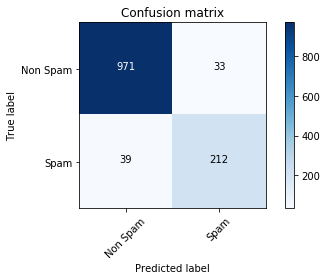

In [83]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non Spam','Spam'], normalize=False,
                      title='Confusion matrix')